
# Проверка гипотез с помощью python.

## Задание

* Выполненить проверку предложенной гипотезы
* Выполненить проверку статистической гипотезы для проверки нормальности числовых признаков
* Проверка мультиколлинеарности
* Все статистические тесты должны быть выполнены с 95%-ным уровнем достоверности (т.е. значение р < 0,05)

## Датасет

Как данные представлены заказчиком:

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Содержит идентификатор клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>Пол клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Является ли клиент пожилым гражданином</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Есть ли у клиента партнер</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Является ли клиент кормильцем</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Количество месяцев, в течение которых клиент оставался в компании</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Есть ли у клиента телефонная связь</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Есть ли у клиента несколько линий</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Интернет-провайдер клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Есть ли у клиента онлайн-безопасность</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Есть ли у клиента онлайн-резервное копирование</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Имеет ли клиент защиту устройства</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Есть ли у клиента техническая поддержка</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Есть ли у клиента потоковое телевидение</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Есть ли у клиента стриминговые сервисы</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>Срок действия контракта заказчика</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>имеет ли клиент безналичные счета</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>Способ оплаты клиента</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>Сумма, взимаемая с клиента ежемесячно </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>Общая сумма, списанная с клиента</td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Ушел ли клиент</td>
<td>categorical</td>
</tr>
</tbody>
</table>

Описание от заказчика:

Каждая строка представляет клиента, каждый столбец содержит атрибуты клиента.

Набор данных включает информацию о:

- Клиенты, которые ушли в течение последнего месяца - колонка называется `Churn`
- Услуги, на которые подписался каждый клиент - телефон, несколько линий, интернет, онлайн-безопасность, резервное копирование, защита устройств, техническая поддержка, потоковое ТВ и фильмы.
- Информация о счетах клиентов - как долго они являются клиентами, контракт, способ оплаты, безналичные счета, ежемесячные платежи и общая сумма платежей.
- Демографическая информация о клиентах - пол, возраст, наличие партнеров и иждивенцев.

## 1. Импорт Библиотек 

Импортируйте необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # отобразить все колонки

from scipy import stats

## 2. Данные

In [2]:
df = pd.read_csv("Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Описательный анализ данных

Рассмотрите данные - изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [3]:
# ваше решение

**Вывод:**

### Уникальные значения для всех столбцов

Рассмотрите уникальные значения категориальных признаков. 

Сделайте вывод.

**Подсказка:** можете воспользоваться методом `describe(include='object')`

In [4]:
# ваше решение

**Вывод:**

## 3. Предобработка данных

### Дубликаты

Предобработайте датасет - проверьте на наличие дубликатов и удалите, если они есть.

In [5]:
# ваше решение

### Отсутствующие значения

Пояснение к данному датасету:

Не всегда в данных есть явные пропуски, которые легко индексируются средствами Pandas. К сожалению бывают проблемы с выгрузками данных, некачественными источниками, или когда данные записываются вручную - часто присутствует человеческий фактов. По мере работы с новыми данными лучше проверять на наличие таких данных, иначе из-за этого исследование может исказиться.

Рассмотрим такой случай:

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Да, не видно пропусков. Но почему тогда столбец `TotalCharges` не отобразился изначально как числовой столбец?

Проверим все столбцы:

In [7]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца {col}:', df[col].apply(lambda x: len(x.strip())==0).sum())

Неявные пропуски столбца TotalCharges: 11


Что мы можем сделать в таком случае?

1) По этому же фильтру удалить строки с пропусками, чтобы не искажать данные
2) Перевести тип столбца на числовой и с параметром `errors = 'coerce'` и удалить

Но можно не удалять, чтобы потерять данные, а:

1) Заменить значения на среднюю
2) Поменять на другое - но только в том случае, если есть какая-то зависимость в данных.

Давайте изменим тип и найдем зависимость:

In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

df[df["TotalCharges"].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Но как выглядят наши данные обычно?**

In [9]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4505,6917-FIJHC,Female,0,Yes,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,26.00,1776.00,No
3921,7964-YESJC,Female,0,Yes,No,24,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,No,Mailed check,66.30,1559.45,No
5444,1833-TCXKK,Male,0,Yes,No,45,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),107.75,4882.80,No
911,7508-SMHXL,Female,1,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,No,Credit card (automatic),89.00,1288.30,No
6703,2737-WFVYW,Female,0,No,No,2,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,45.25,85.50,Yes


**Ничего не заметили?**

Может общая сумма, списанная с клиента, равна сумме, взимаемой с клиента ежемесячно умноженное на количество времени?

Давайте посмострим.

In [10]:
df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


Нашей гипотезе есть место быть.

Но давайте проверим:

In [11]:
print('Количество совпадений по нашей теории:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) == df['tenure']]['customerID'].count())
print('Количество различий:')
print(df[(df['TotalCharges'] / df['MonthlyCharges']) != df['tenure']]['customerID'].count())

Количество совпадений по нашей теории:
614
Количество различий:
6429


**Как видно**, что различий очень много, относительно одинаковых значений.

Но, а если мы проверим наше различие в долях или процентах? Проверяем:

In [12]:
# cоздаем series и считаем TotalCharges вручную
new_total = df['MonthlyCharges'] * df['tenure']

# посчитаем во сколько раз в среднем отличается наш new_total и TotalCharges - в процентном отношении
perc = abs(100 - (new_total / df['TotalCharges']).mean() * 100)

print(f'В среднем new_total отличается от TotalCharges на {perc:.4f}%')

В среднем new_total отличается от TotalCharges на 0.2311%


Как видно, они различаются незначительно (меньше `1%`), от чего мы можем предположить, что `TotalCharges` = `MonthlyCharges` * `время`. Скорее всего такие маленькие различия связаны с тем, что `tenure` округлялся.

В данном датасете указано только количество месяцев, без уточнения времени (до дней), потому будет грубо просто перемножить один столбец на другой. Но пропуски мы уже можем заменить на `0`, так как в тех строках `tenure` == 0. Такое небольшое исследование было сделано для того, чтобы заполнить наши пропуски нужным числом.

Заменим пропуски на нужное нам число.

In [13]:
df['TotalCharges'].fillna(0, inplace=True)

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа - на `int` или `float`
- Если категории - можно оставить `object`

In [14]:
# ваше решение

**Вывод:**

# 4 Проверка гипотез

Задание: сравнить сравнить две выборки - `Churn='No'` и `Churn='Yes'` 

Гипотеза - среднее количество месяцев, в течение которых клиент оставался в компании, отличается между двумя выборками.

In [15]:
# ваше решение

**Вывод:**

## 5 Статистический анализ на норму

Задание: выберите числовые признаки и проведите анализ - соответсвуют ли распредения нормальному?

In [16]:
# ваше решение

**Вывод:**

## 6 ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но требование заказчика - выяснить причину ухода клиента.

Ваша задача - провести полный анализ с помощью статистических гипотез взаимосвязи всех признаков с нашим таргетом `Churn` (целевым признаком). 

**Этапы:**

1) Предобработка данных - измените датасет, в части: категориальные признаки надо перевести в числовые представления (закодировать). Главное - понимать взаимосвязь: бинарный признак, порядковый, просто категории или что-то иное. 
2) Выберите нужные гипотезы, основываясь на типах признаков.
3) Проведите анализ, и выясните, почему клиент уходит, с чем коррелирует `Churn`, может это зависит от пола клиента? Или есть иные обстоятельства?
4) После проверки гипотез, постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
5) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить - может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

**Подсказка:** для того, чтобы перевести наши категориальные переменные в числа (`0`, `1`, `2` и т.д.), можно воспользоваться функцией в `pandas`:

```python
pd.factorize(data[col])
```
Результат будет таким (если взять столбец `gender`):
- `(array([0, 1, 1, ..., 0, 1, 1]), Index(['Female', 'Male'], dtype='object'))`

Где:
- `(array([0, 1, 1, ..., 0, 1, 1])` - это наш новый array, которым можем заменить значения
- `Index(['Female', 'Male'], dtype='object'))` - старые значения, соответствующие числам выше (`Female`=`0`, `Male`=`1`)

Соответственно, можем заменить значения в категориях на числа такой командой (если взять столбец `gender`):
```python
df['gender'] = pd.factorize(df['gender'])[0]
```

> **Примечание:** когда **категориальная** переменная изменяется на числа, она все равно остается **категориальной**! Просто теперь наш признак стал **закодированным** (то есть мы изменили слова на числа). 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df['gender'].value_counts())
df['gender'] = df['gender'].map({'Female':0, 'Male':1})
print(df['gender'].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
gender
1    3555
0    3488
Name: count, dtype: int64


In [5]:
print(df['Partner'].value_counts())
df['Partner'] = df['Partner'].map({'No':0, 'Yes':1})
print(df['Partner'].value_counts())

Partner
No     3641
Yes    3402
Name: count, dtype: int64
Partner
0    3641
1    3402
Name: count, dtype: int64


In [6]:
print(df['Dependents'].value_counts())
df['Dependents'] = df['Dependents'].map({'No':0, 'Yes':1})
print(df['Dependents'].value_counts())

Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Dependents
0    4933
1    2110
Name: count, dtype: int64


In [7]:
print(df['PhoneService'].value_counts())
df['PhoneService'] = df['PhoneService'].map({'No':0, 'Yes':1})
print(df['PhoneService'].value_counts())

PhoneService
Yes    6361
No      682
Name: count, dtype: int64
PhoneService
1    6361
0     682
Name: count, dtype: int64


In [8]:
print(df['PaperlessBilling'].value_counts())
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No':0, 'Yes':1})
print(df['PaperlessBilling'].value_counts())

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64


In [9]:
print(df['Churn'].value_counts())
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
0    5174
1    1869
Name: count, dtype: int64


__Я перевел все значения столбцов, которые имели всего два значения, в числовой тип (0 и 1)__

### Сейчас построю корреляционную матрицу для данных числовых признаков и посмотрю, как она коррелируют с нашей целевой переменной

In [11]:
numerical_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges', 'PaperlessBilling', 'Churn']
df_numerical = df[numerical_list]
df_numerical.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,PaperlessBilling,Churn
0,0,0,1,0,1,0,29.85,29.85,1,0
1,1,0,0,0,34,1,56.95,1889.5,0,0
2,1,0,0,0,2,1,53.85,108.15,1,1
3,1,0,0,0,45,0,42.30,1840.75,0,0
4,0,0,0,0,2,1,70.70,151.65,1,1


In [12]:
df_numerical.corr()

ValueError: could not convert string to float: ' '

__Ошибка, связанная с типом данный, у нас не все данный в этом датафрейме имеют числовой тип__

In [13]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   PaperlessBilling  7043 non-null   int64  
 9   Churn             7043 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 550.4+ KB


**TotalCharges имеет тип object**

In [14]:
df_numerical['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

- Значит у нас есть значения TotalCharges, которые равны __пробелу__
- Заменим их на 0

In [15]:
df_numerical['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df_numerical[df_numerical['TotalCharges'] == ' ']

C:\Users\Alexey\AppData\Local\Temp\ipykernel_8688\2948801194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['TotalCharges'] = df['TotalCharges'].replace(' ', 0)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,PaperlessBilling,Churn


Отлично, значения заменились, переводим к типу __float__

In [16]:
df_numerical['TotalCharges'] = df_numerical['TotalCharges'].astype(float)

C:\Users\Alexey\AppData\Local\Temp\ipykernel_8688\1320432443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['TotalCharges'] = df_numerical['TotalCharges'].astype(float)


Пробуем опять построить корреляционную матрицу

<Axes: >

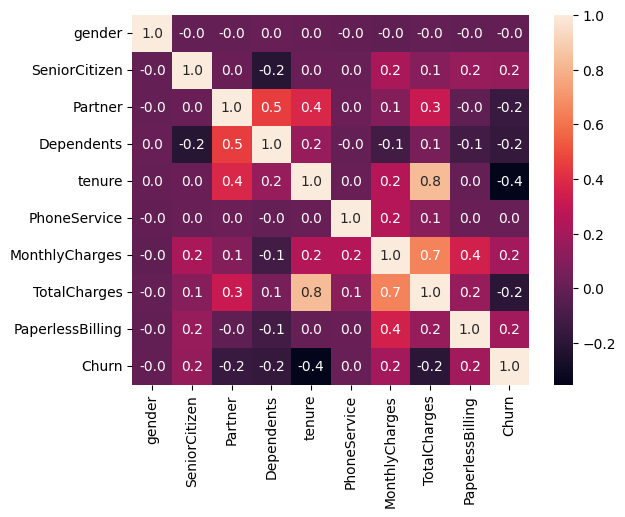

In [17]:
import seaborn as sns

df_numerical_corr = df_numerical.corr()

sns.heatmap(df_numerical_corr, annot=True, fmt=".1f")

**Вывод:**
- С нашей целевой переменной особо сильно ничего не коррелирует, максимум с tenure(-0.4)
- Есть сильная мультиколлинеарность между totalcharges и tenure(0.8) и totalcharges и montlycharges(0.7)


__Интересно, что интуитивно, отток клиентов должен коррелировать ещё и с TotalCharges и с MonthlyCharges, помимо tenure__

__Сделаем проверку гипотез для коэффициента корреляции Пирсона__

In [18]:
from scipy.stats import pearsonr

r, p_value = pearsonr(df_numerical['Churn'], df_numerical['tenure'])
print(f'Коэффициент корреляции {r:.3}, p-value {p_value:.3}')

if p_value < 0.05:
    print('Корреляция значима (p < 0.05)')
else:
    print('Корреляция незначима')


Коэффициент корреляции -0.352, p-value 8e-205
Корреляция значима (p < 0.05)


In [19]:
r, p_value = pearsonr(df_numerical['Churn'], df_numerical['TotalCharges'])
print(f'Коэффициент корреляции {r:.3}, p-value {p_value:.3}')

if p_value < 0.05:
    print('Корреляция значима (p < 0.05)')
else:
    print('Корреляция незначима')

Коэффициент корреляции -0.198, p-value 2.13e-63
Корреляция значима (p < 0.05)


In [20]:
r, p_value = pearsonr(df_numerical['Churn'], df_numerical['MonthlyCharges'])
print(f'Коэффициент корреляции {r:.3}, p-value {p_value:.3}')

if p_value < 0.05:
    print('Корреляция значима (p < 0.05)')
else:
    print('Корреляция незначима')

Коэффициент корреляции 0.193, p-value 2.71e-60
Корреляция значима (p < 0.05)


__Видим, что при видимо низкой корреляции по heatmap, признаки имеют значимую корреляцию__

In [21]:
r, p_value = pearsonr(df_numerical['Churn'], df_numerical['SeniorCitizen'])
print(f'Коэффициент корреляции {r:.3}, p-value {p_value:.3}')

if p_value < 0.05:
    print('Корреляция значима (p < 0.05)')
else:
    print('Корреляция незначима')

Коэффициент корреляции 0.151, p-value 3.84e-37
Корреляция значима (p < 0.05)


In [22]:
r, p_value = pearsonr(df_numerical['Churn'], df_numerical['Partner'])
print(f'Коэффициент корреляции {r:.3}, p-value {p_value:.3}')

if p_value < 0.05:
    print('Корреляция значима (p < 0.05)')
else:
    print('Корреляция незначима')

Коэффициент корреляции -0.15, p-value 6.22e-37
Корреляция значима (p < 0.05)


In [23]:
r, p_value = pearsonr(df_numerical['Churn'], df_numerical['Dependents'])
print(f'Коэффициент корреляции {r:.3}, p-value {p_value:.3}')

if p_value < 0.05:
    print('Корреляция значима (p < 0.05)')
else:
    print('Корреляция незначима')

Коэффициент корреляции -0.164, p-value 9.14e-44
Корреляция значима (p < 0.05)


In [24]:
r, p_value = pearsonr(df_numerical['Churn'], df_numerical['PaperlessBilling'])
print(f'Коэффициент корреляции {r:.3}, p-value {p_value:.3}')

if p_value < 0.05:
    print('Корреляция значима (p < 0.05)')
else:
    print('Корреляция незначима')

Коэффициент корреляции 0.192, p-value 2.36e-59
Корреляция значима (p < 0.05)


__Решил проверить остальные признаки, которые показались мне не значимыми, а они ,по коэффициенту корреляции Пирсона, оказались значимы__

### Теперь построю корреляционную матрицу для признаков, в которых 3 и более значения 

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [26]:
df_encoder_list = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn']
df_encoder_no_churn = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df_encoder = df[df_encoder_list]
df_encoder = pd.get_dummies(df_encoder, columns=df_encoder_no_churn, drop_first=True)
df_encoder.head()

,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [28]:
df_encoder.columns

Index(['Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

__Получил новый датафрейм, в котором использовал метод ___pd.get_dummies___, который преобразовал мне все категориальные признаки, с 3 и более значениями__

### Строим кореляционную матрицу

<Axes: >

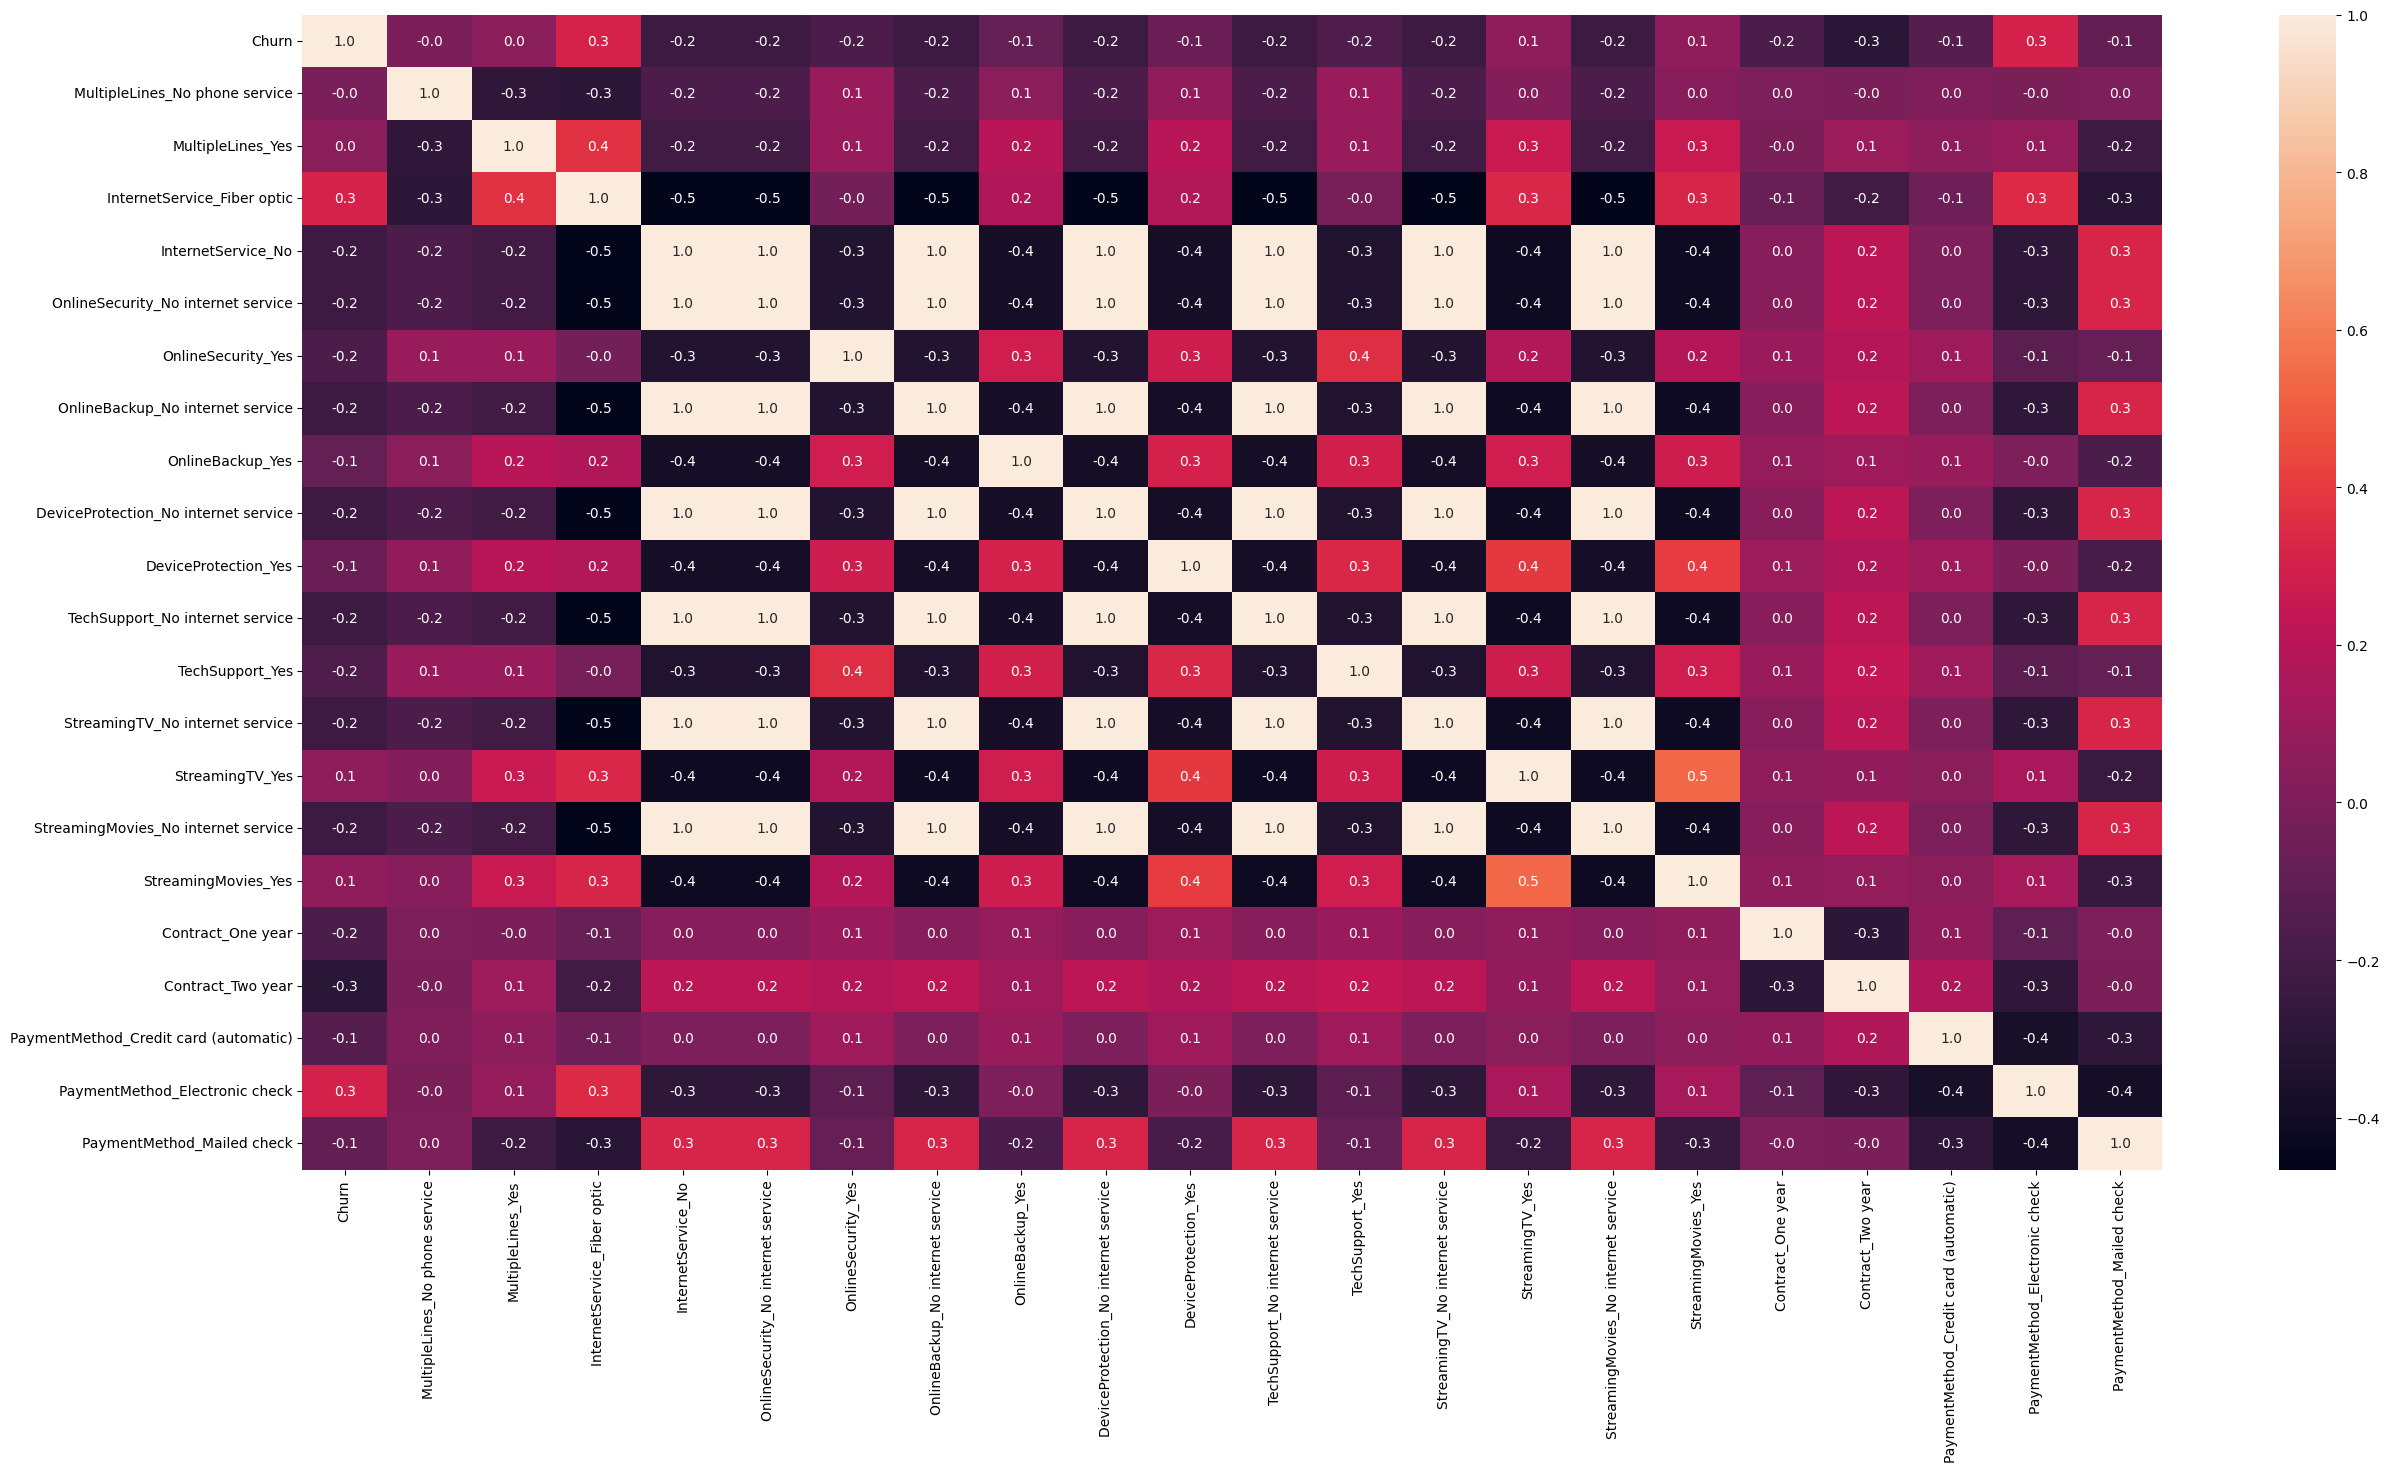

In [29]:
import matplotlib.pyplot as plt

df_encoder_corr = df_encoder.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(df_encoder_corr, annot=True, fmt='.1f')

**Выводы:**
- churn ни с одним категориальным признаком не коррелирует сильно
- Есть очень сильные мультиколлинеарности и их много